In [6]:
%env MUJOCO_GL=egl
from mushroom_rl.core import Core, Agent
import pickle
from loco_mujoco import LocoEnv
import mujoco
import numpy as np
from numpy import linalg as LA
from operator import itemgetter
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import matplotlib as mpl
from dm_control.mujoco import *
from tqdm.notebook import tqdm
from sklearn.metrics import root_mean_squared_error, r2_score
from utils import process_data
from speed_env_wrapper import SpeedWrapper
from scipy.signal import find_peaks
import os
import loco_mujoco

library_path = os.path.dirname(loco_mujoco.__file__)
file_path = os.path.join(library_path, 'environments', 'data', 'humanoid', 'humanoid_torque.xml')
physics = Physics.from_xml_path(file_path)
mass = np.sum(physics.named.model.body_mass._field)
speed_range = np.round(np.linspace(0.65, 1.85, 13), 2)
mdp = LocoEnv.make("HumanoidTorque.walk", headless=True)
mdp = SpeedWrapper(mdp, (speed_range[0], speed_range[-1]))
_ = mdp.reset()

env: MUJOCO_GL=egl


In [3]:
model_paths = {
    'model': 'path/to/your/model',
}

  0%|          | 0/2 [00:00<?, ?it/s]

/home/metamobility/miniconda3/envs/locomujoco/lib/python3.10/site-packages/mushroom_rl/core/serialization.py:215: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.

Number of recorded cycle: 26
Number of effective cycle: 24
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 24
Number of effective cycle: 22
Number of recorded cycle: 28
Number of effective cycle: 25
Number of recorded cycle: 28
Number of effective cycle: 26
Average speed: 0.9518343065458468
Average speed: 0.9473626375612564
Average speed: 0.9572670280167722
Average speed: 0.9775041937423171
Average speed: 0.9128699419126047



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.78it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.60it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.45it/s]
                                                                                                                     

Number of recorded cycle: 23
Number of effective cycle: 20
Number of recorded cycle: 32
Number of effective cycle: 30
Number of recorded cycle: 28
Number of effective cycle: 26
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 26
Number of effective cycle: 24
Average speed: 0.9697452542547019
Average speed: 0.9359059420993348
Average speed: 0.9223190437564351
Average speed: 0.9465349692561972
Average speed: 0.9515892986156343



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.51it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 22
Number of effective cycle: 21
Number of recorded cycle: 33
Number of effective cycle: 30
Number of recorded cycle: 33
Number of effective cycle: 32
Number of recorded cycle: 31
Number of effective cycle: 27
Number of recorded cycle: 33
Number of effective cycle: 33
Average speed: 0.9856763855666558
Average speed: 0.9228878539747707
Average speed: 0.921330208423771
Average speed: 0.943337685985318
Average speed: 0.9188514558806009



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.46it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.58it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 32
Number of effective cycle: 32
Number of recorded cycle: 23
Number of effective cycle: 22
Number of recorded cycle: 13
Number of effective cycle: 13
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 0.9651383246839533
Average speed: 0.9408331889243465
Average speed: 1.0234527711294203
Average speed: 0.9263531873490519
Average speed: 0.936860011476696



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.41it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.47it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.43it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 31
Number of effective cycle: 26
Number of recorded cycle: 28
Number of effective cycle: 26
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 22
Number of effective cycle: 21
Average speed: 0.9237898664914548
Average speed: 0.9983169955314111
Average speed: 0.93858546641193
Average speed: 0.9336789894656622
Average speed: 0.9897107006195756



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.14it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                     

Number of recorded cycle: 22
Number of effective cycle: 20
Number of recorded cycle: 32
Number of effective cycle: 32
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 30
Number of effective cycle: 30
Average speed: 0.988475927301552
Average speed: 0.9757180766979785
Average speed: 0.9787650393354237
Average speed: 0.9443679177629708
Average speed: 0.9307400647582423



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.17it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Average speed: 0.9972215495900119
Average speed: 0.9652586040401568
Average speed: 0.9731428449186381
Average speed: 0.9666902710155446
Average speed: 0.9384913895246636



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 31
Average speed: 0.9525580688586576
Average speed: 0.9724328898703924
Average speed: 0.9946985781147347
Average speed: 0.983780364259325
Average speed: 0.9538030832044645



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 24
Number of effective cycle: 22
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 31
Average speed: 0.9971400647596538
Average speed: 1.025816713136161
Average speed: 0.9908041283380365
Average speed: 0.9813835491632825
Average speed: 0.9740533523091603



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 30
Average speed: 1.0283029902500478
Average speed: 1.0109184420271558
Average speed: 0.9982556276969099
Average speed: 1.0110825696380839
Average speed: 1.0041412882061007



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 22
Number of effective cycle: 21
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.0279587716501237
Average speed: 1.0103429997843358
Average speed: 1.0508801522806113
Average speed: 1.0201849011608966
Average speed: 1.0075462510392565



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 32
Number of effective cycle: 30
Average speed: 1.0156102691090856
Average speed: 1.0399468849378248
Average speed: 1.0095920947550172
Average speed: 1.0155352709470842
Average speed: 1.0442262691792783



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 21
Number of effective cycle: 21
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.027997461109253
Average speed: 1.1005047168488973
Average speed: 1.0207885715386043
Average speed: 1.0460583032119357
Average speed: 1.012634386784265



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Average speed: 1.0515108609787946
Average speed: 1.0603984332703422
Average speed: 1.053120397811287
Average speed: 1.0755520617267458
Average speed: 1.0577832064029904



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 31
Average speed: 1.0532167487369568
Average speed: 1.0625194380542107
Average speed: 1.0676658025041958
Average speed: 1.0533096528729309
Average speed: 1.096013825638447



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.0787461454498055
Average speed: 1.1065638666953954
Average speed: 1.0979154847815786
Average speed: 1.061822118840658
Average speed: 1.0816679453864921



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 31
Number of effective cycle: 29
Average speed: 1.0912623611625845
Average speed: 1.1050697678661048
Average speed: 1.1145218905552476
Average speed: 1.0692122260971644
Average speed: 1.0925339118416104



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Average speed: 1.1193753705849565
Average speed: 1.1281545631246257
Average speed: 1.118642538897502
Average speed: 1.1198526556686783
Average speed: 1.1026965524090064



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 30
Average speed: 1.1410393211732495
Average speed: 1.1399873300676708
Average speed: 1.109855855004074
Average speed: 1.1323711357725075
Average speed: 1.1004974892550092



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.1521585893179003
Average speed: 1.127896047239325
Average speed: 1.1324217940346866
Average speed: 1.1392409433152573
Average speed: 1.1221754711536016



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.1250718188907638
Average speed: 1.1381989929119416
Average speed: 1.148754767923611
Average speed: 1.135025958404804
Average speed: 1.147650012801832



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.1704564543900076
Average speed: 1.1403632448858403
Average speed: 1.1474867527054557
Average speed: 1.150076634651213
Average speed: 1.139750409879439



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.15it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.1608753561670684
Average speed: 1.1597452557640635
Average speed: 1.1613413775055592
Average speed: 1.168514998699082
Average speed: 1.1699389350051164



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 29
Average speed: 1.1689520779482367
Average speed: 1.1692407075462585
Average speed: 1.1316119326002825
Average speed: 1.148821938529708
Average speed: 1.1774358857349214



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.193427989458545
Average speed: 1.175797264222959
Average speed: 1.1565721131096225
Average speed: 1.1632695886636848
Average speed: 1.1781299832015206



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 29
Average speed: 1.1939245097731896
Average speed: 1.1868490551749755
Average speed: 1.1729029463627056
Average speed: 1.201361818239158
Average speed: 1.1739726441099294



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 28
Average speed: 1.192934931596256
Average speed: 1.201898177492204
Average speed: 1.2065889436107864
Average speed: 1.2119257511940613
Average speed: 1.2198252310975675



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 29
Average speed: 1.219671688890068
Average speed: 1.1945061507781332
Average speed: 1.1967060123175506
Average speed: 1.2223364428493957
Average speed: 1.2240985552476464



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 29
Average speed: 1.2114155400137097
Average speed: 1.2019629118292026
Average speed: 1.2045674562580526
Average speed: 1.2234332116712583
Average speed: 1.22092753131699



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 29
Average speed: 1.2214671486276738
Average speed: 1.2077052502114503
Average speed: 1.2286606213675182
Average speed: 1.24612181718447
Average speed: 1.2156784314252669



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.2293089441031964
Average speed: 1.2358661850017456
Average speed: 1.2244803266324695
Average speed: 1.2444055824662554
Average speed: 1.2247864695507176



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Average speed: 1.235240574715564
Average speed: 1.231248534499995
Average speed: 1.2309727086059072
Average speed: 1.2612542366819453
Average speed: 1.2583952895970072



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.246880506864422
Average speed: 1.2656957433338094
Average speed: 1.2604102393902419
Average speed: 1.2284432630849
Average speed: 1.2673688815542121



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Average speed: 1.2709592913980339
Average speed: 1.262663991219964
Average speed: 1.2820725614065425
Average speed: 1.255233521306635
Average speed: 1.2659049543476157



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.2674393557519452
Average speed: 1.2594237486699111
Average speed: 1.2608268642933753
Average speed: 1.2656840637844216
Average speed: 1.2820297848592856



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.36it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.285173099764587
Average speed: 1.312180413383667
Average speed: 1.2814127251257985
Average speed: 1.2707885090422513
Average speed: 1.2765695615165826



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.3086641387440634
Average speed: 1.2857341264072175
Average speed: 1.3026039918088843
Average speed: 1.2832389128940587
Average speed: 1.311881720758604



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.35it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.2984212696322721
Average speed: 1.2811095536711425
Average speed: 1.299163286584646
Average speed: 1.3022957753607063
Average speed: 1.289391955882891



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.2924552711722526
Average speed: 1.3029422480502508
Average speed: 1.2881358167835943
Average speed: 1.2915852936260794
Average speed: 1.277680519679731



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Average speed: 1.3066919024931436
Average speed: 1.3057068978970892
Average speed: 1.3020091470017388
Average speed: 1.3042413024920412
Average speed: 1.3032941969949463



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.3013995611015563
Average speed: 1.3286607266538797
Average speed: 1.3303988019085633
Average speed: 1.311719482887258
Average speed: 1.3510215798421552



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.3331712358944208
Average speed: 1.3192172870399541
Average speed: 1.321674185056181
Average speed: 1.320674620458287
Average speed: 1.3252488229805677



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.3282167952272073
Average speed: 1.3358325719956161
Average speed: 1.3518400707252587
Average speed: 1.3410145214014022
Average speed: 1.3112182144331053



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.331102397877556
Average speed: 1.3428279808112833
Average speed: 1.3418630618175516
Average speed: 1.2967259872897017
Average speed: 1.3398873027102862



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.342978769157537
Average speed: 1.362925792273309
Average speed: 1.3497118469001148
Average speed: 1.3451842001991838
Average speed: 1.3219129593796592



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.3546309170886202
Average speed: 1.3362461367436913
Average speed: 1.3565381440219666
Average speed: 1.3332318874443756
Average speed: 1.3557055340297872



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.355560948000327
Average speed: 1.3707558305023315
Average speed: 1.361358974045538
Average speed: 1.3532549558990041
Average speed: 1.363609760630498



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.3642931801006313
Average speed: 1.3679628866352387
Average speed: 1.3716647051960973
Average speed: 1.3636513372727952
Average speed: 1.3767007240883076



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.3648276405654869
Average speed: 1.3842670410463536
Average speed: 1.3819364400019676
Average speed: 1.3857330537249188
Average speed: 1.3791030892952174



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.3628153214382952
Average speed: 1.3828682274436888
Average speed: 1.365462402347901
Average speed: 1.3680049314491607
Average speed: 1.3698836117079112



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 27
Average speed: 1.3670472175757553
Average speed: 1.3868673230324033
Average speed: 1.3803859921596007
Average speed: 1.3690651285374527
Average speed: 1.3904445039183917



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.3853891270304908
Average speed: 1.4077628517935021
Average speed: 1.3823139624831255
Average speed: 1.392842755805404
Average speed: 1.371075257703363



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 23
Number of effective cycle: 23
Average speed: 1.3857079313337162
Average speed: 1.3971137331576362
Average speed: 1.4040783537424546
Average speed: 1.3936190641774278
Average speed: 1.3924451422535644



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.37it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 25
Number of effective cycle: 24
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 26
Average speed: 1.416794900420949
Average speed: 1.377363744745692
Average speed: 1.4194934365304825
Average speed: 1.3909772965832072
Average speed: 1.3738344424646671



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.49it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 26
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.4167157145700773
Average speed: 1.417382829204356
Average speed: 1.426403830955867
Average speed: 1.3977048102966418
Average speed: 1.3972527382938746


/home/metamobility/miniconda3/envs/locomujoco/lib/python3.10/site-packages/mushroom_rl/core/serialization.py:215: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.

Number of recorded cycle: 23
Number of effective cycle: 22
Number of recorded cycle: 22
Number of effective cycle: 22
Number of recorded cycle: 19
Number of effective cycle: 18
Number of recorded cycle: 22
Number of effective cycle: 20
Number of recorded cycle: 16
Number of effective cycle: 16
Average speed: 0.715391678405746
Average speed: 0.7021059600264272
Average speed: 0.5760038164303561
Average speed: 0.689749043523519
Average speed: 0.45956551016889646



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 23
Number of effective cycle: 22
Number of recorded cycle: 22
Number of effective cycle: 21
Number of recorded cycle: 23
Number of effective cycle: 22
Number of recorded cycle: 21
Number of effective cycle: 19
Number of recorded cycle: 22
Number of effective cycle: 21
Average speed: 0.7599446099616987
Average speed: 0.7334088474787932
Average speed: 0.6359308383764517
Average speed: 0.6145713481000268
Average speed: 0.6973626776717853



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 22
Number of effective cycle: 21
Number of recorded cycle: 21
Number of effective cycle: 20
Number of recorded cycle: 21
Number of effective cycle: 20
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 23
Number of effective cycle: 23
Average speed: 0.7350675506843678
Average speed: 0.7474631323355948
Average speed: 0.6028554601898326
Average speed: 0.7614890796672711
Average speed: 0.7192472326755283



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 18
Number of effective cycle: 16
Number of recorded cycle: 21
Number of effective cycle: 21
Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 19
Number of effective cycle: 19
Number of recorded cycle: 23
Number of effective cycle: 22
Average speed: 0.5723145552425509
Average speed: 0.6885561903283195
Average speed: 0.7795362906792109
Average speed: 0.6777124840586958
Average speed: 0.8052961634509808



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 22
Number of effective cycle: 22
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 21
Number of effective cycle: 21
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 24
Average speed: 0.69900518245259
Average speed: 0.7734092905215239
Average speed: 0.7164318977227111
Average speed: 0.7728636202002345
Average speed: 0.7980760610748379



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 22
Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 22
Number of effective cycle: 22
Number of recorded cycle: 26
Number of effective cycle: 23
Average speed: 0.7981862288229887
Average speed: 0.6615948573832667
Average speed: 0.8215295251500165
Average speed: 0.8005763562654387
Average speed: 0.7679501802584331



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 25
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 25
Number of effective cycle: 23
Number of recorded cycle: 23
Number of effective cycle: 22
Average speed: 0.8296655412714979
Average speed: 0.8069180089195136
Average speed: 0.8478977559416324
Average speed: 0.7971332172658676
Average speed: 0.7530842379048037



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.46it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]
                                                                                                                     

Number of recorded cycle: 24
Number of effective cycle: 21
Number of recorded cycle: 25
Number of effective cycle: 24
Number of recorded cycle: 19
Number of effective cycle: 18
Number of recorded cycle: 21
Number of effective cycle: 21
Number of recorded cycle: 24
Number of effective cycle: 24
Average speed: 0.5952281462522565
Average speed: 0.8450086328820673
Average speed: 0.7290521097372504
Average speed: 0.8361156011121383
Average speed: 0.8352985788416766



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                     

Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 22
Number of effective cycle: 21
Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 25
Number of effective cycle: 25
Average speed: 0.8646832727318661
Average speed: 0.8384772679848559
Average speed: 0.840488841745766
Average speed: 0.8706281610090384
Average speed: 0.8861891371233371



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 25
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 25
Number of effective cycle: 24
Average speed: 0.8576025375250679
Average speed: 0.870412019895051
Average speed: 0.8791633231458968
Average speed: 0.895924706782684
Average speed: 0.8604126899927605



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                     

Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 26
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 24
Number of effective cycle: 24
Average speed: 0.9007167513992315
Average speed: 0.8887495549080742
Average speed: 0.7723409274845341
Average speed: 0.9175687789490976
Average speed: 0.9044413874816879



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 24
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 25
Number of effective cycle: 25
Number of recorded cycle: 25
Number of effective cycle: 25
Average speed: 0.7982599544858737
Average speed: 0.9098327910008408
Average speed: 0.8893905264722097
Average speed: 0.9487672373502716
Average speed: 0.8938938390347317



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 23
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 25
Number of effective cycle: 25
Average speed: 0.9627676239050346
Average speed: 0.9109942783745122
Average speed: 0.8868439721390805
Average speed: 0.9537427027630798
Average speed: 0.9376531742584824



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 25
Number of effective cycle: 25
Average speed: 0.9724673487749604
Average speed: 0.9269713509484239
Average speed: 0.9427436371315804
Average speed: 0.9557672074054339
Average speed: 0.9774231233349056



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 25
Number of effective cycle: 25
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 25
Number of effective cycle: 25
Number of recorded cycle: 25
Number of effective cycle: 25
Average speed: 0.9419590530716778
Average speed: 0.9234203338011919
Average speed: 0.9439932078895933
Average speed: 0.9577922334109525
Average speed: 0.9428062783570561



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 25
Number of effective cycle: 24
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 25
Number of effective cycle: 25
Average speed: 1.053659262327656
Average speed: 0.970072482976519
Average speed: 0.9783935632593287
Average speed: 1.013940486258962
Average speed: 1.0238888967455462



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 23
Number of effective cycle: 22
Average speed: 0.9937522275182709
Average speed: 0.9431026681244815
Average speed: 1.007482454515567
Average speed: 0.9721938630158826
Average speed: 0.9826049769549475



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 23
Number of effective cycle: 23
Number of recorded cycle: 26
Number of effective cycle: 25
Average speed: 1.0032210896258085
Average speed: 1.0232496942374059
Average speed: 1.0172021385625196
Average speed: 0.8519692449782991
Average speed: 1.036095898564635



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 25
Number of effective cycle: 25
Number of recorded cycle: 27
Number of effective cycle: 25
Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.0881562957432982
Average speed: 1.001877274569377
Average speed: 0.9791869085156576
Average speed: 1.0494376673866421
Average speed: 1.023015531176377



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 25
Average speed: 1.068995601966966
Average speed: 1.031939415935508
Average speed: 1.0582521156510585
Average speed: 1.0656160972881938
Average speed: 1.1056383010786894



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.19it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 26
Average speed: 1.1006732966236166
Average speed: 1.0514994300625973
Average speed: 1.097370938752063
Average speed: 1.0765390369003904
Average speed: 1.0777634547830282



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 27
Average speed: 1.0512474530240725
Average speed: 1.134392174947728
Average speed: 1.0877304087878252
Average speed: 1.0800680700851122
Average speed: 1.065069485703031



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 27
Average speed: 1.2029920076221345
Average speed: 1.159068498679868
Average speed: 1.154548047165444
Average speed: 1.0981427334776646
Average speed: 1.0911288208378014



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 28
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Average speed: 1.1854247376499347
Average speed: 1.0563975327475132
Average speed: 1.12864192527638
Average speed: 1.1194791426673094
Average speed: 1.190616619959469



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 26
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 27
Average speed: 1.1217925477574164
Average speed: 1.1937802191089435
Average speed: 1.1553674838049384
Average speed: 1.1591232200837116
Average speed: 1.1784808084417657



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 27
Number of effective cycle: 26
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 26
Number of recorded cycle: 29
Number of effective cycle: 28
Average speed: 1.1959797257594003
Average speed: 1.1408583063924997
Average speed: 1.1804644037532732
Average speed: 1.1647568701192554
Average speed: 1.166445559252252



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.1739490990270807
Average speed: 1.2114866314704884
Average speed: 1.1806972384198229
Average speed: 1.1423965169761992
Average speed: 1.2333508683153969



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.2263025463425352
Average speed: 1.2041543949191433
Average speed: 1.2112379829837696
Average speed: 1.1617459141240498
Average speed: 1.2194031238477132



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 24
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 27
Number of effective cycle: 27
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.2746158343071174
Average speed: 1.195677521942494
Average speed: 1.2347994451409485
Average speed: 1.2274270202197215
Average speed: 1.267240352213765



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.17it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.180002457940793
Average speed: 1.2944722561134145
Average speed: 1.1949701510426773
Average speed: 1.2629226844131565
Average speed: 1.2400002940082835



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.47it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                     

Number of recorded cycle: 24
Number of effective cycle: 24
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.2312804996999458
Average speed: 1.2610287674748466
Average speed: 1.3024836275545648
Average speed: 1.2616789644080662
Average speed: 1.29347414199669



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 21
Number of effective cycle: 21
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 27
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.2673451365235224
Average speed: 1.3039001715717953
Average speed: 1.224584272010311
Average speed: 1.3036406232239555
Average speed: 1.3131123662378144



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 28
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 28
Average speed: 1.2355004220327694
Average speed: 1.3363735177922313
Average speed: 1.3094791979468794
Average speed: 1.2450056961111395
Average speed: 1.2563104465657395



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 27
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 28
Number of effective cycle: 27
Average speed: 1.299698827907514
Average speed: 1.3296716058750426
Average speed: 1.2360239046637231
Average speed: 1.3314747618415084
Average speed: 1.2683202677209984



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 28
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Average speed: 1.3570120164826889
Average speed: 1.265360754655901
Average speed: 1.301458624725103
Average speed: 1.3808097673851956
Average speed: 1.347679866141065



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Average speed: 1.3725254285992532
Average speed: 1.3673898634626263
Average speed: 1.365019253979696
Average speed: 1.2993420280369343
Average speed: 1.377877833728345



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 29
Number of effective cycle: 28
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 28
Average speed: 1.3677591825729918
Average speed: 1.3500076052354786
Average speed: 1.3243986951315345
Average speed: 1.3126662163293374
Average speed: 1.3478286361500431



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.43it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 29
Number of effective cycle: 29
Average speed: 1.3801892075104376
Average speed: 1.3454784618114493
Average speed: 1.389896653664772
Average speed: 1.3785955582363527
Average speed: 1.3764078554374544



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.38it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.37it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 26
Number of effective cycle: 25
Number of recorded cycle: 26
Number of effective cycle: 26
Number of recorded cycle: 30
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 31
Number of effective cycle: 30
Average speed: 1.4316870353092481
Average speed: 1.393337186505647
Average speed: 1.4157391367716512
Average speed: 1.3678713853274262
Average speed: 1.3925557277033485



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.64it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 29
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 30
Number of recorded cycle: 21
Number of effective cycle: 20
Number of recorded cycle: 31
Number of effective cycle: 31
Average speed: 1.4144085755920275
Average speed: 1.3697173532054148
Average speed: 1.3952287100085587
Average speed: 1.2901296233218789
Average speed: 1.4560672718043122



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                     

Number of recorded cycle: 32
Number of effective cycle: 32
Number of recorded cycle: 32
Number of effective cycle: 32
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 31
Average speed: 1.4176431907614682
Average speed: 1.3875656857988412
Average speed: 1.383036709470036
Average speed: 1.356778579821696
Average speed: 1.3842172797257772



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                     

Number of recorded cycle: 32
Number of effective cycle: 32
Number of recorded cycle: 34
Number of effective cycle: 32
Number of recorded cycle: 31
Number of effective cycle: 31
Number of recorded cycle: 28
Number of effective cycle: 22
Number of recorded cycle: 31
Number of effective cycle: 31
Average speed: 1.4529248310307854
Average speed: 1.3709028339340124
Average speed: 1.412735072309327
Average speed: 1.473954063194524
Average speed: 1.3689354630087724



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                     

Number of recorded cycle: 33
Number of effective cycle: 32
Number of recorded cycle: 32
Number of effective cycle: 31
Number of recorded cycle: 31
Number of effective cycle: 30
Number of recorded cycle: 33
Number of effective cycle: 32
Number of recorded cycle: 32
Number of effective cycle: 30
Average speed: 1.383873447341369
Average speed: 1.4667065776718582
Average speed: 1.4474629572084374
Average speed: 1.3993849886501712
Average speed: 1.4030515085282322



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 29
Number of recorded cycle: 33
Number of effective cycle: 33
Number of recorded cycle: 32
Number of effective cycle: 29
Number of recorded cycle: 33
Number of effective cycle: 32
Number of recorded cycle: 32
Number of effective cycle: 32
Average speed: 1.4930230900582981
Average speed: 1.4214611838798827
Average speed: 1.4280793978161055
Average speed: 1.4138792000707938
Average speed: 1.4302156463563407



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.16it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
                                                                                                                     

Number of recorded cycle: 34
Number of effective cycle: 34
Number of recorded cycle: 35
Number of effective cycle: 34
Number of recorded cycle: 35
Number of effective cycle: 34
Number of recorded cycle: 34
Number of effective cycle: 30
Number of recorded cycle: 35
Number of effective cycle: 34
Average speed: 1.4657032654902082
Average speed: 1.4139760109595816
Average speed: 1.4396182888679196
Average speed: 1.4938831430065567
Average speed: 1.4120818338633487



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
                                                                                                                     

Number of recorded cycle: 36
Number of effective cycle: 30
Number of recorded cycle: 38
Number of effective cycle: 29
Number of recorded cycle: 34
Number of effective cycle: 33
Number of recorded cycle: 35
Number of effective cycle: 27
Number of recorded cycle: 38
Number of effective cycle: 32
Average speed: 1.4803491235257866
Average speed: 1.4828901471386349
Average speed: 1.4931913005182633
Average speed: 1.498792164993681
Average speed: 1.441849265420472



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.38it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.17it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.40it/s]
                                                                                                                     

Number of recorded cycle: 39
Number of effective cycle: 33
Number of recorded cycle: 36
Number of effective cycle: 31
Number of recorded cycle: 42
Number of effective cycle: 27
Number of recorded cycle: 38
Number of effective cycle: 29
Number of recorded cycle: 30
Number of effective cycle: 26
Average speed: 1.4865274132965758
Average speed: 1.4726212636452414
Average speed: 1.4493439566900113
Average speed: 1.5136369821654327
Average speed: 1.4520074390716609



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.37it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                     

Number of recorded cycle: 37
Number of effective cycle: 31
Number of recorded cycle: 39
Number of effective cycle: 30
Number of recorded cycle: 43
Number of effective cycle: 26
Number of recorded cycle: 41
Number of effective cycle: 30
Number of recorded cycle: 41
Number of effective cycle: 30
Average speed: 1.507421509711849
Average speed: 1.5038219892651434
Average speed: 1.488159343241231
Average speed: 1.5133635740002063
Average speed: 1.4914971358076627



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.36it/s]
                                                                                                                     

Number of recorded cycle: 48
Number of effective cycle: 19
Number of recorded cycle: 46
Number of effective cycle: 24
Number of recorded cycle: 41
Number of effective cycle: 32
Number of recorded cycle: 39
Number of effective cycle: 24
Number of recorded cycle: 42
Number of effective cycle: 25
Average speed: 1.5145156833958608
Average speed: 1.4898704042762365
Average speed: 1.4821869336320828
Average speed: 1.5584658033404726
Average speed: 1.5537564836258524



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.49it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.38it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.48it/s]
                                                                                                                     

Number of recorded cycle: 43
Number of effective cycle: 20
Number of recorded cycle: 48
Number of effective cycle: 15
Number of recorded cycle: 46
Number of effective cycle: 22
Number of recorded cycle: 42
Number of effective cycle: 19
Number of recorded cycle: 44
Number of effective cycle: 24
Average speed: 1.5655103501548902
Average speed: 1.5800546928404589
Average speed: 1.556152713774202
Average speed: 1.5787419501737836
Average speed: 1.5366650974991511



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.98it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.64it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.53it/s]
                                                                                                                     

Number of recorded cycle: 33
Number of effective cycle: 15
Number of recorded cycle: 35
Number of effective cycle: 12
Number of recorded cycle: 51
Number of effective cycle: 16
Number of recorded cycle: 44
Number of effective cycle: 12
Number of recorded cycle: 42
Number of effective cycle: 13
Average speed: 1.601047994025189
Average speed: 1.618426559202229
Average speed: 1.6013671710117399
Average speed: 1.6488691541230498
Average speed: 1.6052667162768892



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.48it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.76it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]
                                                                                                                     

Number of recorded cycle: 39
Number of effective cycle: 14
Number of recorded cycle: 47
Number of effective cycle: 19
Number of recorded cycle: 35
Number of effective cycle: 9
Number of recorded cycle: 47
Number of effective cycle: 14
Number of recorded cycle: 39
Number of effective cycle: 19
Average speed: 1.636583563941956
Average speed: 1.5710143656707998
Average speed: 1.6752289649075693
Average speed: 1.627417992666157
Average speed: 1.6187699571254697



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.85it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.04it/s]
                                                                                                                     

Number of recorded cycle: 49
Number of effective cycle: 13
Number of recorded cycle: 40
Number of effective cycle: 10
Number of recorded cycle: 36
Number of effective cycle: 11
Number of recorded cycle: 33
Number of effective cycle: 8
Number of recorded cycle: 35
Number of effective cycle: 9
Average speed: 1.6839609610699828
Average speed: 1.6718297636348407
Average speed: 1.64430420765996
Average speed: 1.6991313226516904
Average speed: 1.64430081239951



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.39it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.43it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.67it/s]
                                                                                                                     

Number of recorded cycle: 28
Number of effective cycle: 8
Number of recorded cycle: 26
Number of effective cycle: 9
Number of recorded cycle: 37
Number of effective cycle: 9
Number of recorded cycle: 27
Number of effective cycle: 8
Number of recorded cycle: 38
Number of effective cycle: 10
Average speed: 1.7028920529817695
Average speed: 1.6339356388692534
Average speed: 1.739377359142621
Average speed: 1.7073524575354508
Average speed: 1.7160283486031396



100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.05it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.22it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.12it/s]
                                                                                                                             
100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.65it/s]
                                                                                                                     

Number of recorded cycle: 31
Number of effective cycle: 6
Number of recorded cycle: 27
Number of effective cycle: 9
Number of recorded cycle: 33
Number of effective cycle: 8
Number of recorded cycle: 26
Number of effective cycle: 8
Number of recorded cycle: 37
Number of effective cycle: 6
Average speed: 1.733539450043424
Average speed: 1.7070316497490754
Average speed: 1.7158981672990332
Average speed: 1.6196253134602412
Average speed: 1.7509223768981241


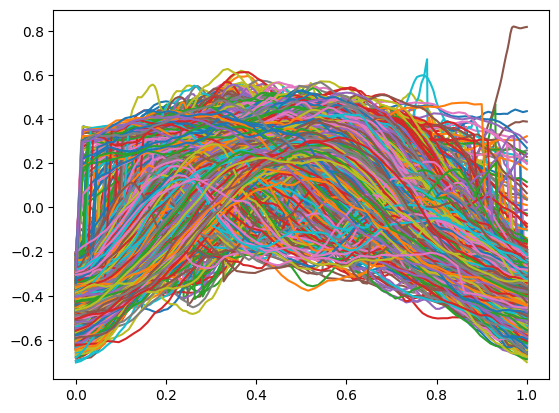

In [6]:
results = {}
for curriculum, model_path in tqdm(model_paths.items()):
    eval_data = eval_model(model_paths[curriculum], n_trials=5, n_episodes=3, plot=True, cycle_length_cutoff=60, record=False)
    results[curriculum] = eval_data

In [7]:
results.keys()

dict_keys(['baseline', 'best'])

In [8]:
with open('best_vs_baseline_1126.pkl', 'wb') as handle:
    pickle.dump(results, handle)

In [9]:
with open('best_vs_baseline_1126.pkl', 'rb') as handle:
    results = pickle.load(handle)

In [6]:
with open('best_1120.pkl', 'rb') as handle:
    results = pickle.load(handle)

In [7]:
results.keys()

dict_keys(['baseline', 'best'])

In [8]:
processed_results = {}
for reward_ratio in results:
    processed_results[reward_ratio] = {}
    metric = calculate_metrics(results[reward_ratio], interpolated_data)
    speed_RMSEs, speed_R2s, bio_RMSEs, bio_R2s = [], [], [], []
    for trial in metric:
        actual_speeds = [metric[trial][speed]['actual_speed'] for speed in metric[trial]]
        target_speeds = list(metric[trial].keys())
        
        speed_RMSEs.append(root_mean_squared_error(target_speeds, actual_speeds))
        speed_R2s.append(r2_score(target_speeds, actual_speeds))
        bio_RMSEs.append(np.mean([metric[trial][speed]['RMSE'] for speed in metric[trial]]))
        bio_R2s.append(np.mean([metric[trial][speed]['R2'] for speed in metric[trial]]))
        
    processed_results[reward_ratio]['speed_RMSE'] = speed_RMSEs
    processed_results[reward_ratio]['speed_R2'] = speed_R2s
    processed_results[reward_ratio]['bio_RMSE'] = bio_RMSEs
    processed_results[reward_ratio]['bio_R2'] = bio_R2s

In [9]:
from scipy.stats import f_oneway

# Conduct the one-way ANOVA
print('anova bio')
print(f_oneway(processed_results['best']['bio_RMSE'], processed_results['baseline']['bio_RMSE']))
print('anova speed')
print(f_oneway(processed_results['best']['speed_RMSE'], processed_results['baseline']['speed_RMSE']))


anova bio
F_onewayResult(statistic=264.2909270660187, pvalue=2.0618358251409437e-07)
anova speed
F_onewayResult(statistic=7933.280380202541, pvalue=2.8172862833279e-13)


In [10]:
curriculums = processed_results.keys()
bio_RMSE_avgs = [np.mean(processed_results[curriculum]['bio_RMSE']) for curriculum in curriculums]
bio_RMSE_stds = [np.std(processed_results[curriculum]['bio_RMSE']) for curriculum in curriculums]
bio_R2_avgs = [np.mean(processed_results[curriculum]['bio_R2']) for curriculum in curriculums]
bio_R2_stds = [np.std(processed_results[curriculum]['bio_R2']) for curriculum in curriculums]

speed_RMSE_avgs = [np.mean(processed_results[curriculum]['speed_RMSE']) for curriculum in curriculums]
speed_RMSE_stds = [np.std(processed_results[curriculum]['speed_RMSE']) for curriculum in curriculums]
speed_R2_avgs = [np.mean(processed_results[curriculum]['speed_R2']) for curriculum in curriculums]
speed_R2_stds = [np.std(processed_results[curriculum]['speed_R2']) for curriculum in curriculums]

In [11]:
print(f'curriculum {curriculums}')
print(f'bio RMSE avg {bio_RMSE_avgs}')
print(f'bio RMSE std {bio_RMSE_stds}')
print(f'bio R2 avg {bio_R2_avgs}')
print(f'bio R2 std {bio_R2_stds}')

print(f'speed RMSE avg {speed_RMSE_avgs}')
print(f'speed RMSE std {speed_RMSE_stds}')
print(f'speed R2 avg {speed_R2_avgs}')
print(f'speed R2 std {speed_R2_stds}')

curriculum dict_keys(['baseline', 'best'])
bio RMSE avg [6.489438313929682, 5.2421409433333]
bio RMSE std [0.1242444291000659, 0.09005195700555015]
bio R2 avg [0.7021430966671491, 0.8226827564705272]
bio R2 std [0.016319947337898336, 0.009951133270645842]
speed RMSE avg [0.23935347899477452, 0.05515465152117972]
speed RMSE std [0.0031483476774380468, 0.00268238416488018]
speed R2 avg [0.5907142857142856, 0.9782197802197802]
speed R2 std [0.010726704552503363, 0.0021053637344968356]


In [12]:
best_actual_speeds, best_target_speeds = [], []
best_metric = calculate_metrics(results['best'], interpolated_data)
for trial in metric:
    best_actual_speeds.append([best_metric[trial][speed]['actual_speed'] for speed in best_metric[trial]])
    best_target_speeds.append(list(best_metric[trial].keys()))
best_actual_speeds_data = np.array(best_actual_speeds).flatten()
best_target_speeds_data = np.array(best_target_speeds).flatten()

In [13]:
baseline_actual_speeds, baseline_target_speeds = [], []
baseline_metric = calculate_metrics(results['baseline'], interpolated_data)
for trial in baseline_metric:
    baseline_actual_speeds.append([baseline_metric[trial][speed]['actual_speed'] for speed in baseline_metric[trial]])
    baseline_target_speeds.append(list(baseline_metric[trial].keys()))
baseline_actual_speeds_data = np.array(baseline_actual_speeds).flatten()
baseline_target_speeds_data = np.array(baseline_target_speeds).flatten()

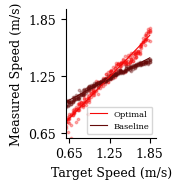

In [16]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 9})
plt.rcParams["font.family"] = "serif"
cm = 1/2.54
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

fig, axs = plt.subplots(1, 1, figsize=(4.5*cm, 5*cm))
if type(axs)!= list:
    axs = [axs]

s, alpha = 3, 0.3
axs[0].scatter(best_target_speeds_data, best_actual_speeds_data, color='#F50808', alpha=alpha, s=s)
axs[0].scatter(baseline_target_speeds_data, baseline_actual_speeds_data, color='#660B0A', alpha=alpha, s=s)

best_p, _ = np.polyfit(best_target_speeds_data, best_actual_speeds_data, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
best_y_model = equation(best_p, best_target_speeds_data) 
axs[0].plot(best_target_speeds_data, best_y_model, "-", color='#F50808', linewidth=0.8, alpha=1, label='Optimal')
baseline_p, _ = np.polyfit(baseline_target_speeds_data, baseline_actual_speeds_data, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
baseline_y_model = equation(baseline_p, baseline_target_speeds_data) 
axs[0].plot(baseline_target_speeds_data, baseline_y_model, "-", color='#660B0A', linewidth=0.8, alpha=1, label='Baseline')


axs[0].set_ylim([0.6, 1.95])
axs[0].set_xlim([0.6, 1.95])
axs[0].set_xlabel('Target Speed (m/s)')
axs[0].set_ylabel('Measured Speed (m/s)')
axs[0].set_xticks([0.65, 1.25, 1.85])
axs[0].set_yticks([0.65, 1.25, 1.85])
axs[0].spines[['right', 'top']].set_visible(False)
axs[0].legend(loc=4, prop={'size': 6})

plt.tight_layout()
# plt.savefig('target vs actual speed 1120.png', dpi=300)

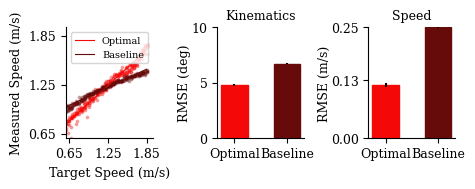

In [17]:
cm = 1/2.54
fig, axs = plt.subplots(1, 3, figsize=(12 * cm, 5 * cm))
font_size = 9
mpl.rcParams.update({'font.size': font_size})
plt.rcParams["font.family"] = "serif"
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 
s, alpha = 3, 0.3
axs[0].scatter(best_target_speeds_data, best_actual_speeds_data, color='#F50808', alpha=alpha, s=s)
axs[0].scatter(baseline_target_speeds_data, baseline_actual_speeds_data, color='#660B0A', alpha=alpha, s=s)

best_p, _ = np.polyfit(best_target_speeds_data, best_actual_speeds_data, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
best_y_model = equation(best_p, best_target_speeds_data) 
axs[0].plot(best_target_speeds_data, best_y_model, "-", color='#F50808', linewidth=0.8, alpha=1, label='Optimal')
baseline_p, _ = np.polyfit(baseline_target_speeds_data, baseline_actual_speeds_data, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
baseline_y_model = equation(baseline_p, baseline_target_speeds_data) 
axs[0].plot(baseline_target_speeds_data, baseline_y_model, "-", color='#660B0A', linewidth=0.8, alpha=1, label='Baseline')


axs[0].set_ylim([0.6, 1.95])
axs[0].set_xlim([0.6, 1.95])
axs[0].set_xlabel('Target Speed (m/s)')
axs[0].set_ylabel('Measured Speed (m/s)')
axs[0].set_xticks([0.65, 1.25, 1.85])
axs[0].set_yticks([0.65, 1.25, 1.85])
axs[0].spines[['right', 'top']].set_visible(False)
axs[0].legend(loc=2, prop={'size': 7})

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.5
bar1 = axs[1].bar(ind, bio_RMSE_avgs[::-1], width, yerr=bio_RMSE_stds[::-1], color='#BC0909')
bar1[0].set_color('#F50808')
bar1[1].set_color('#660B0A')

axs[1].set_ylabel('RMSE (deg)', labelpad=0)
axs[1].set_ylim([0, 10])
axs[1].set_xticks(ind, ('Optimal', 'Baseline'))
axs[1].set_yticks([0, 5, 10])
axs[1].set_title('Kinematics', fontsize=font_size)
axs[1].spines[['right', 'top']].set_visible(False)

bar2 = axs[2].bar(ind, speed_RMSE_avgs[::-1], width, yerr=speed_RMSE_stds[::-1], color='#BC0909')
bar2[0].set_color('#F50808')
bar2[1].set_color('#660B0A')
axs[2].set_ylabel('RMSE (m/s)', labelpad=0)
axs[2].set_ylim([0, 0.25])
axs[2].set_xticks(ind, ('Optimal', 'Baseline'))
axs[2].set_yticks([0, 0.13, 0.25])
axs[2].set_title('Speed', fontsize=font_size)
axs[2].spines[['right', 'top']].set_visible(False)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=None)
plt.tight_layout()
# plt.show()
# plt.savefig('best vs baseline 1121.png', dpi=300)

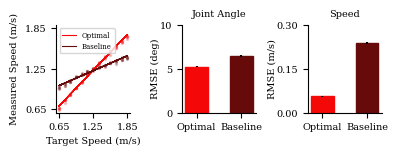

In [26]:
from matplotlib.gridspec import GridSpec
cm = 1/2.54
fig = plt.figure(figsize=(10 * cm, 4 * cm))

# Define a GridSpec with 3 rows and 1 column
gs = GridSpec(1, 3, figure=fig, wspace=0)  # hspace here controls global spacing

# Add subplots to specific rows of the GridSpec
axs = []
axs.append(fig.add_subplot(gs[0]))
axs.append(fig.add_subplot(gs[1]))
axs.append(fig.add_subplot(gs[2]))

font_size = 7
mpl.rcParams.update({'font.size': font_size})
plt.rcParams["font.family"] = "serif"
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 
s, alpha = 2, 0.2
axs[0].scatter(best_target_speeds_data, best_actual_speeds_data, color='#F50808', alpha=alpha, s=s)
axs[0].scatter(baseline_target_speeds_data, baseline_actual_speeds_data, color='#660B0A', alpha=alpha, s=s)

best_p, _ = np.polyfit(best_target_speeds_data, best_actual_speeds_data, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
best_y_model = equation(best_p, best_target_speeds_data) 
axs[0].plot(best_target_speeds_data, best_y_model, "-", color='#F50808', linewidth=0.8, alpha=1, label='Optimal')
baseline_p, _ = np.polyfit(baseline_target_speeds_data, baseline_actual_speeds_data, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
baseline_y_model = equation(baseline_p, baseline_target_speeds_data) 
axs[0].plot(baseline_target_speeds_data, baseline_y_model, "-", color='#660B0A', linewidth=0.8, alpha=1, label='Baseline')


axs[0].set_ylim([0.6, 1.9])
axs[0].set_xlim([0.6, 1.9])
axs[0].set_xlabel('Target Speed (m/s)')
axs[0].set_ylabel('Measured Speed (m/s)')
axs[0].set_xticks([0.65, 1.25, 1.85])
axs[0].set_yticks([0.65, 1.25, 1.85])
axs[0].spines[['right', 'top']].set_visible(False)
axs[0].legend(loc=2, prop={'size': 5})

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.5
bar1 = axs[1].bar(ind, bio_RMSE_avgs[::-1], width, yerr=bio_RMSE_stds[::-1], color='#BC0909')
bar1[0].set_color('#F50808')
bar1[1].set_color('#660B0A')

axs[1].set_ylabel('RMSE (deg)', labelpad=0)
axs[1].set_ylim([0, 10])
axs[1].set_xticks(ind, ('Optimal', 'Baseline'))
axs[1].set_yticks([0, 5, 10])
axs[1].set_title('Joint Angle', fontsize=font_size)
axs[1].spines[['right', 'top']].set_visible(False)

bar2 = axs[2].bar(ind, speed_RMSE_avgs[::-1], width, yerr=speed_RMSE_stds[::-1], color='#BC0909')
bar2[0].set_color('#F50808')
bar2[1].set_color('#660B0A')
axs[2].set_ylabel('RMSE (m/s)', labelpad=0)
axs[2].set_ylim([0, 0.25])
axs[2].set_xticks(ind, ('Optimal', 'Baseline'))
axs[2].set_yticks([0, 0.15, 0.30])
axs[2].set_title('Speed', fontsize=font_size)
axs[2].spines[['right', 'top']].set_visible(False)

gs.tight_layout(fig)
plt.savefig('best vs baseline 1121.png', dpi=300)

In [30]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 7})

# Computations ----------------------------------------------------------------    
# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 


x = target_speeds_data
y = actual_speeds_data
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = y.size                                                 # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

# Data
ax.scatter(target_speeds_list, actual_speed_means, color='black')
ax.errorbar(target_speeds_list, actual_speed_means, yerr=actual_speed_stds, fmt="o", color='black')

# Fit
ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  
ax.set_ylim([0.6, 1.95])
ax.set_xlim([0.6, 1.95])
ax.set_xlabel('Target Speed (m/s)')
ax.set_ylabel('Actual Speed (m/s)')
ax.set_xticks([0.65, 0.95, 1.25, 1.55, 1.85])
ax.set_yticks([0.65, 0.95, 1.25, 1.55, 1.85])

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
fig.tight_layout()
# plt.savefig('best target vs actual speed 1119.png')


NameError: name 'target_speeds_data' is not defined

In [ ]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
    
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}
    
    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    
    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color='tab:blue', alpha=0.3)
    # ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="")

    return ax

In [3]:
def calculate_metrics(eval_data, ground_truth):
    metric = {}
    for i, eval_data_ in enumerate(eval_data):
        metric[i] = {}
        for speed in eval_data_:
            metric[i][speed] = {}
            RMSE, R2 = 0, 0
            for data_joint, eval_joint in zip(['q_hip_flexion_r', 'q_knee_angle_r', 'q_ankle_angle_r'], ['Hip', 'Knee', 'Ankle']):
                avg_data = np.mean(ground_truth[speed]['cycles'][data_joint], axis=0)
                avg_eval = np.mean(eval_data_[speed]['data'][eval_joint]['Angle (deg)'], axis=0)
                avg_eval_interpolated = np.interp(np.linspace(0, 1, num=len(avg_data)), np.linspace(0, 1, num=len(avg_eval)), avg_eval)
                RMSE += root_mean_squared_error(avg_data, avg_eval_interpolated)
                R2 += r2_score(avg_data, avg_eval_interpolated)
            metric[i][speed]['RMSE'] = RMSE/3
            metric[i][speed]['R2'] = R2/3
            metric[i][speed]['actual_speed'] = eval_data_[speed]['mean_speed']
        
    return metric

def eval_model(model_file, n_trials=5, n_episodes=1, cycle_length_cutoff=40, plot=False, record=False):
    agent = Agent.load(model_file)
    data_dict = {}
    for target_speed in speed_range:
        data_dict[target_speed] = {}
    
        mdp.set_operate_speed(target_speed)
        _ = mdp.reset()
        
        data, mean_length, speeds = process_data(agent, mdp, n_trials=n_trials, n_episodes=n_episodes, plot=plot, cycle_length_cutoff=cycle_length_cutoff, is_exo=False, is_bio_torque=False, record=record, is_wrapped=True)
        data_dict[target_speed]['data'] = data
        data_dict[target_speed]['mean_length'] = mean_length
        data_dict[target_speed]['speeds'] = speeds

    processed_datas = []
    for i in range(n_trials):
        processed_data = {}
        HIP_GEAR, KNEE_GEAR, ANKLE_GEAR = 275, 600, 500
        for speed in data_dict:
            processed_data[speed] = {
                'data': {
                    'Hip': {},
                    'Knee': {},
                    'Ankle': {}
                },
                'idxs': None,
            }
            
            processed_data[speed]['data']['Hip']['Angle (deg)'] = np.rad2deg(data_dict[speed]['data'][i]['q_hip_flexion_l'])
            processed_data[speed]['data']['Knee']['Angle (deg)'] = -1*np.rad2deg(data_dict[speed]['data'][i]['q_knee_angle_l'])
            processed_data[speed]['data']['Ankle']['Angle (deg)'] = np.rad2deg(data_dict[speed]['data'][i]['q_ankle_angle_l'])
        
            processed_data[speed]['data']['Hip']['Torque (Nm/kg)'] = -1*data_dict[speed]['data'][i]['mot_hip_flexion_l'] * HIP_GEAR / mass
            processed_data[speed]['data']['Knee']['Torque (Nm/kg)'] = data_dict[speed]['data'][i]['mot_knee_angle_l'] * KNEE_GEAR / mass
            processed_data[speed]['data']['Ankle']['Torque (Nm/kg)'] = -1*data_dict[speed]['data'][i]['mot_ankle_angle_l'] * ANKLE_GEAR / mass
        
            processed_data[speed]['data']['Hip']['Power (W/kg)'] = np.multiply(data_dict[speed]['data'][i]['dq_hip_flexion_l'], data_dict[speed]['data'][i]['mot_hip_flexion_l'] * HIP_GEAR) / mass
            processed_data[speed]['data']['Knee']['Power (W/kg)'] = np.multiply(data_dict[speed]['data'][i]['dq_knee_angle_l'], data_dict[speed]['data'][i]['mot_knee_angle_l'] * KNEE_GEAR) / mass
            processed_data[speed]['data']['Ankle']['Power (W/kg)'] = np.multiply(data_dict[speed]['data'][i]['dq_ankle_angle_l'], data_dict[speed]['data'][i]['mot_ankle_angle_l'] * ANKLE_GEAR) / mass
        
            processed_data[speed]['idxs'] = np.linspace(0, 1, data_dict[speed]['mean_length'][i])*100
            
            processed_data[speed]['mean_speed'] = round(np.mean(data_dict[speed]['speeds'][i]), 2)
        processed_datas.append(processed_data)
    return processed_datas

In [5]:
def interpolate_data(data, mean_length):
    interpolated_data = dict()
    
    for speed in tqdm(data, desc='Interpolating Data'):        
        interpolated_cycles = {}
            
        for joint in data[speed]:
            interpolated_cycles[joint] = []

            for joint_cycle in data[speed][joint]:
                x = np.linspace(0, len(joint_cycle)-1, num=len(joint_cycle))
                xnew = np.linspace(0, len(joint_cycle)-1, num=mean_length)
                spl = CubicSpline(x, joint_cycle) 
                interpolated_cycles[joint].append(spl(xnew))
                    
        for joint in interpolated_cycles:
            interpolated_cycles[joint] = np.array(interpolated_cycles[joint])
    
        interpolated_data[speed] = {
            'cycles': interpolated_cycles,
            'mean_length': mean_length,
        }
        
    return interpolated_data
    
with open('locomujoco_transformed_data_1113_rootspeed125.pkl', 'rb') as f:
    synthetic_data = pickle.load(f)

# with open('../../../gatech-dataset/test/locomujoco_transformed_data_55_speeds_0025_increment.pkl', 'rb') as f:
#     synthetic_data = pickle.load(f)
    
min_peak_synthetic_data = {}

for speed in synthetic_data:
    min_peak_synthetic_data[speed] = {}

    concat_data = {}
    for joint in ['q_hip_flexion_r', 'q_knee_angle_r', 'q_ankle_angle_r']:
        concat_data[joint] = np.concatenate(synthetic_data[speed][joint])
    
    hip_data = np.concatenate(synthetic_data[speed]['q_hip_flexion_r'])
    heel_strikes, _ = find_peaks(-1*hip_data, height=np.deg2rad(8), distance=40)
    cycle_lengths = np.diff(heel_strikes)
    
    for joint in ['q_hip_flexion_r', 'q_knee_angle_r', 'q_ankle_angle_r']:
        min_peak_synthetic_data[speed][joint] = []   
        for i, cycle_length in enumerate(cycle_lengths):
            if cycle_length > 40:
                min_peak_synthetic_data[speed][joint].append(concat_data[joint][heel_strikes[i]:heel_strikes[i+1]])
                
interpolated_data = interpolate_data(min_peak_synthetic_data, 114)      

Interpolating Data:   0%|          | 0/28 [00:00<?, ?it/s]